In [335]:
import warnings
import numpy as np
import pandas as pd

In [336]:
dataset=pd.read_csv('bike_sharing_data.csv')
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [337]:
dataset.shape

(730, 16)

In [338]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [339]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [340]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [341]:
#Assigning string values instead of numbers for seasons column
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
dataset['season'] = dataset['season'].replace(season_mapping)


In [342]:
dataset['season'].astype('category').value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [343]:
dataset['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [344]:
season_mapping3 = {1: 'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dataset['mnth'] = dataset['mnth'].replace(season_mapping3)

In [345]:
dataset['mnth'].value_counts()

mnth
Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: count, dtype: int64

In [346]:
season_mapping2 = {1: 'Mon',2:'Tue',3:'Wed',4:'Thurs',5:'Fri',6:'Sat',0:'Sun'}
dataset['weekday'] = dataset['weekday'].replace(season_mapping2)

In [347]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tue      104
Wed      103
Name: count, dtype: int64

In [348]:
dataset['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [349]:
dataset['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\duggi\AppData\Local\Temp\ipykernel_7624\4114729198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['temp'])


<Axes: xlabel='temp', ylabel='Density'>

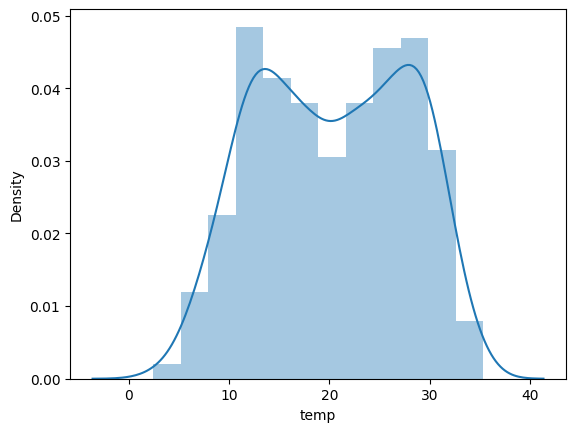

In [351]:
sns.distplot(dataset['temp'])

C:\Users\duggi\AppData\Local\Temp\ipykernel_7624\455683093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['atemp'])


<Axes: xlabel='atemp', ylabel='Density'>

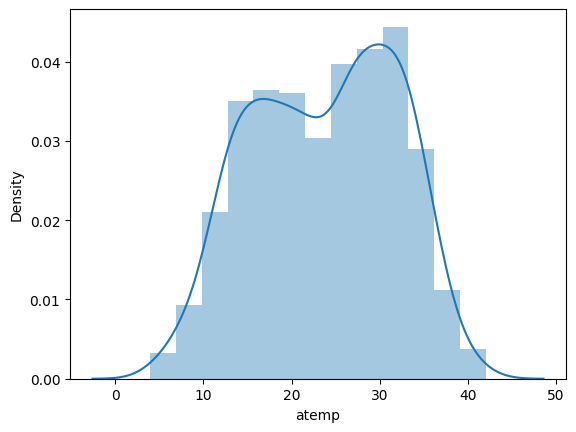

In [352]:
sns.distplot(dataset['atemp'])

C:\Users\duggi\AppData\Local\Temp\ipykernel_7624\3372033259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['windspeed'])


<Axes: xlabel='windspeed', ylabel='Density'>

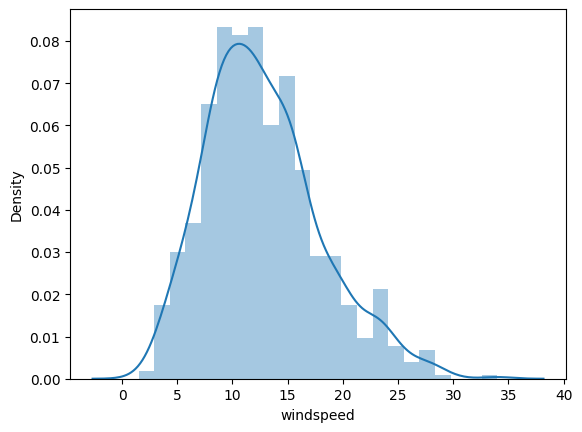

In [353]:
sns.distplot(dataset['windspeed'])


In [354]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')


In [355]:
dataset_categorical=dataset.select_dtypes(exclude=['float64','datetime64[ns]','int64'])
dataset_categorical.columns

Index(['season', 'mnth', 'weekday'], dtype='object')

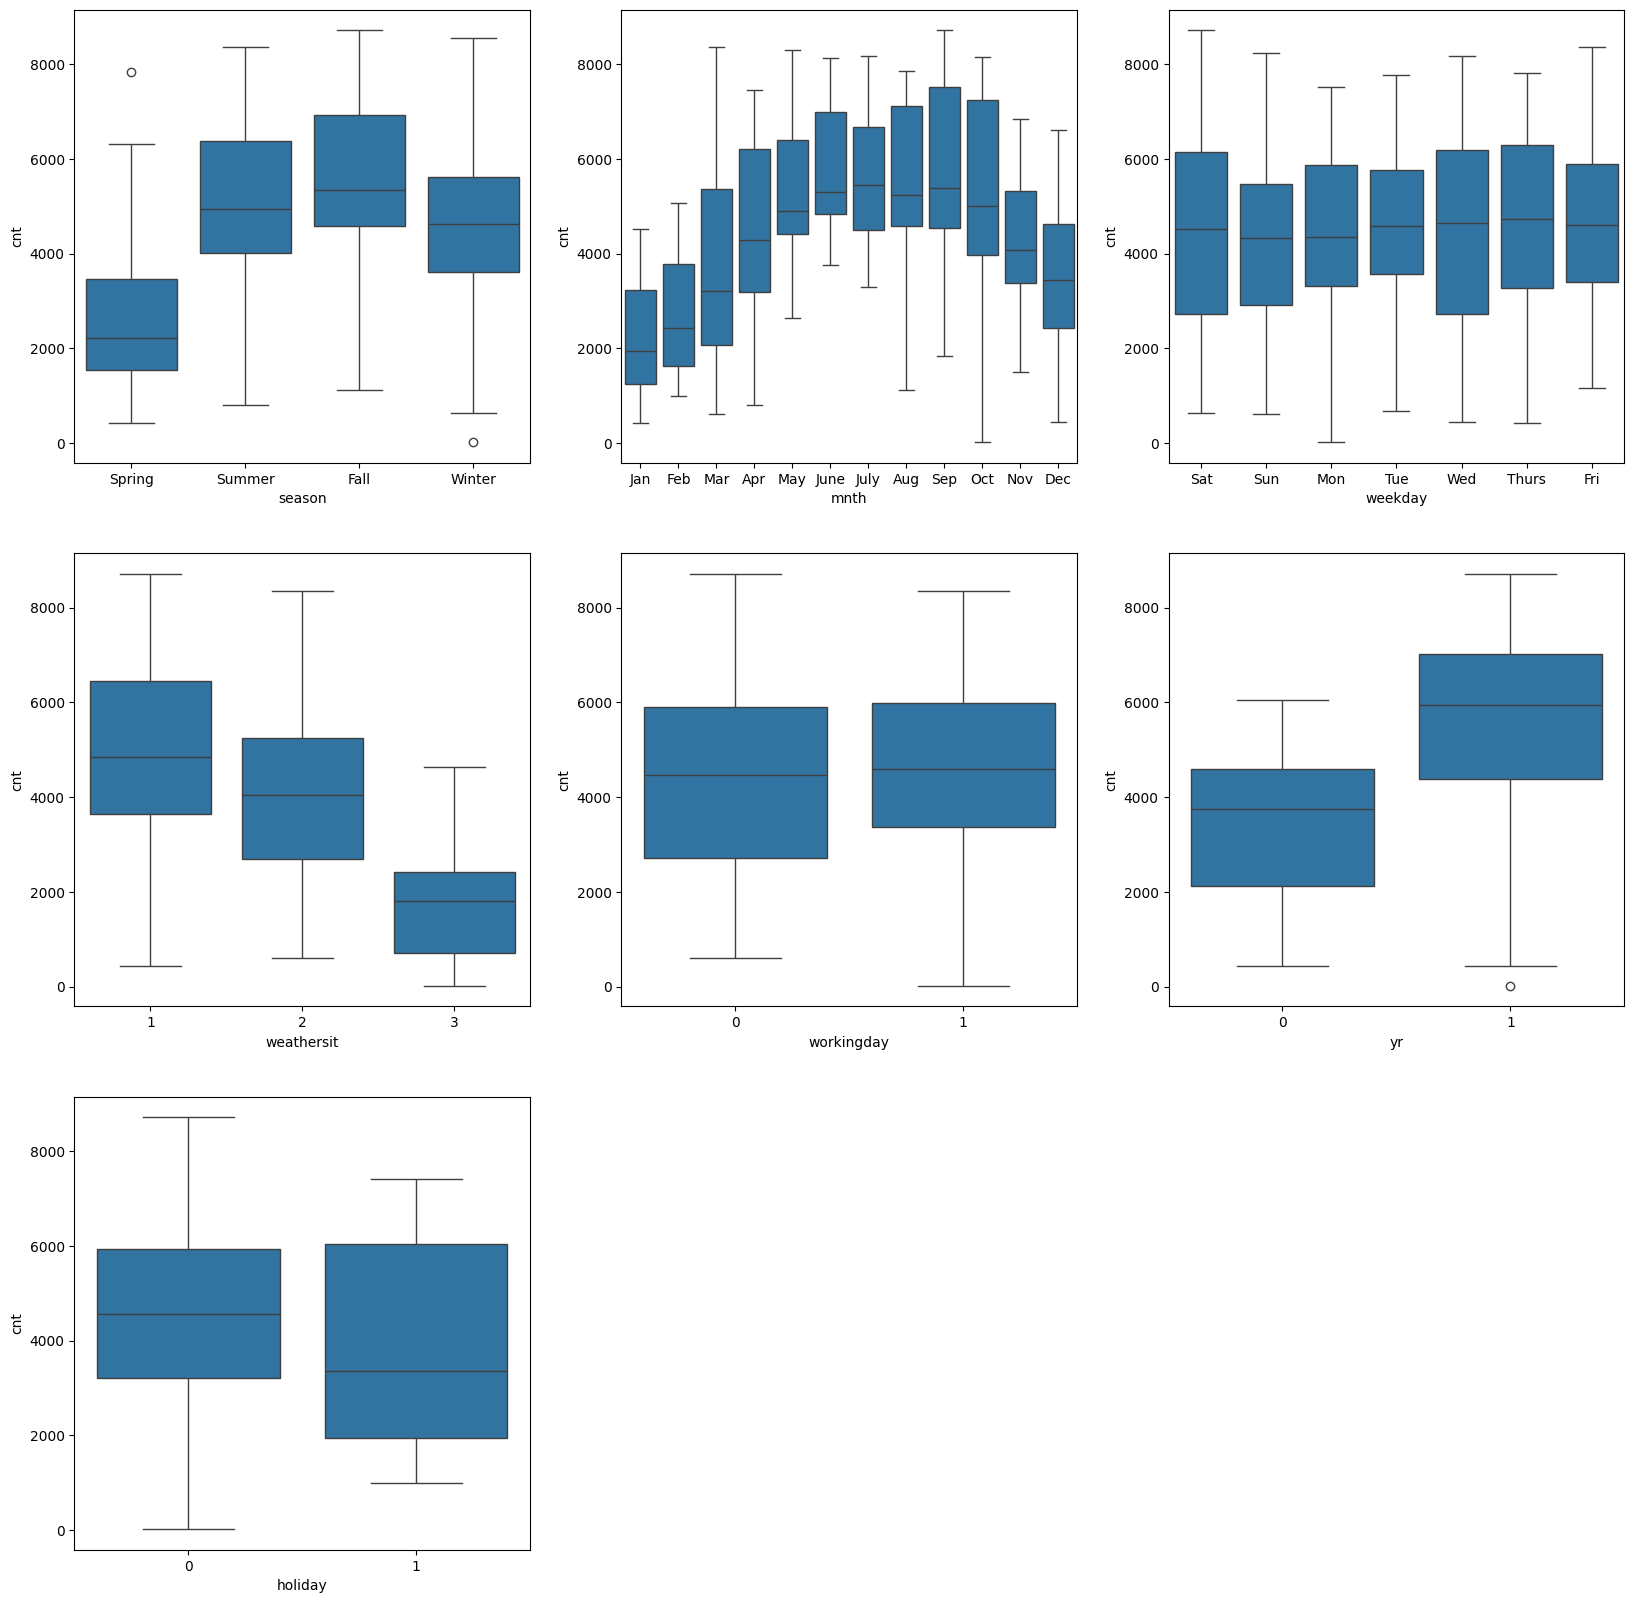

In [356]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x='yr',y='cnt',data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=dataset)
plt.show()

In [357]:
intvarlist=['casual','registered','cnt']
for var in intvarlist:
    dataset[var]=dataset[var].astype('float64')

In [358]:
dataset_numeric=dataset.select_dtypes(include=['float64'])
dataset_numeric

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0
726,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0
727,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0
728,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0


c:\python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


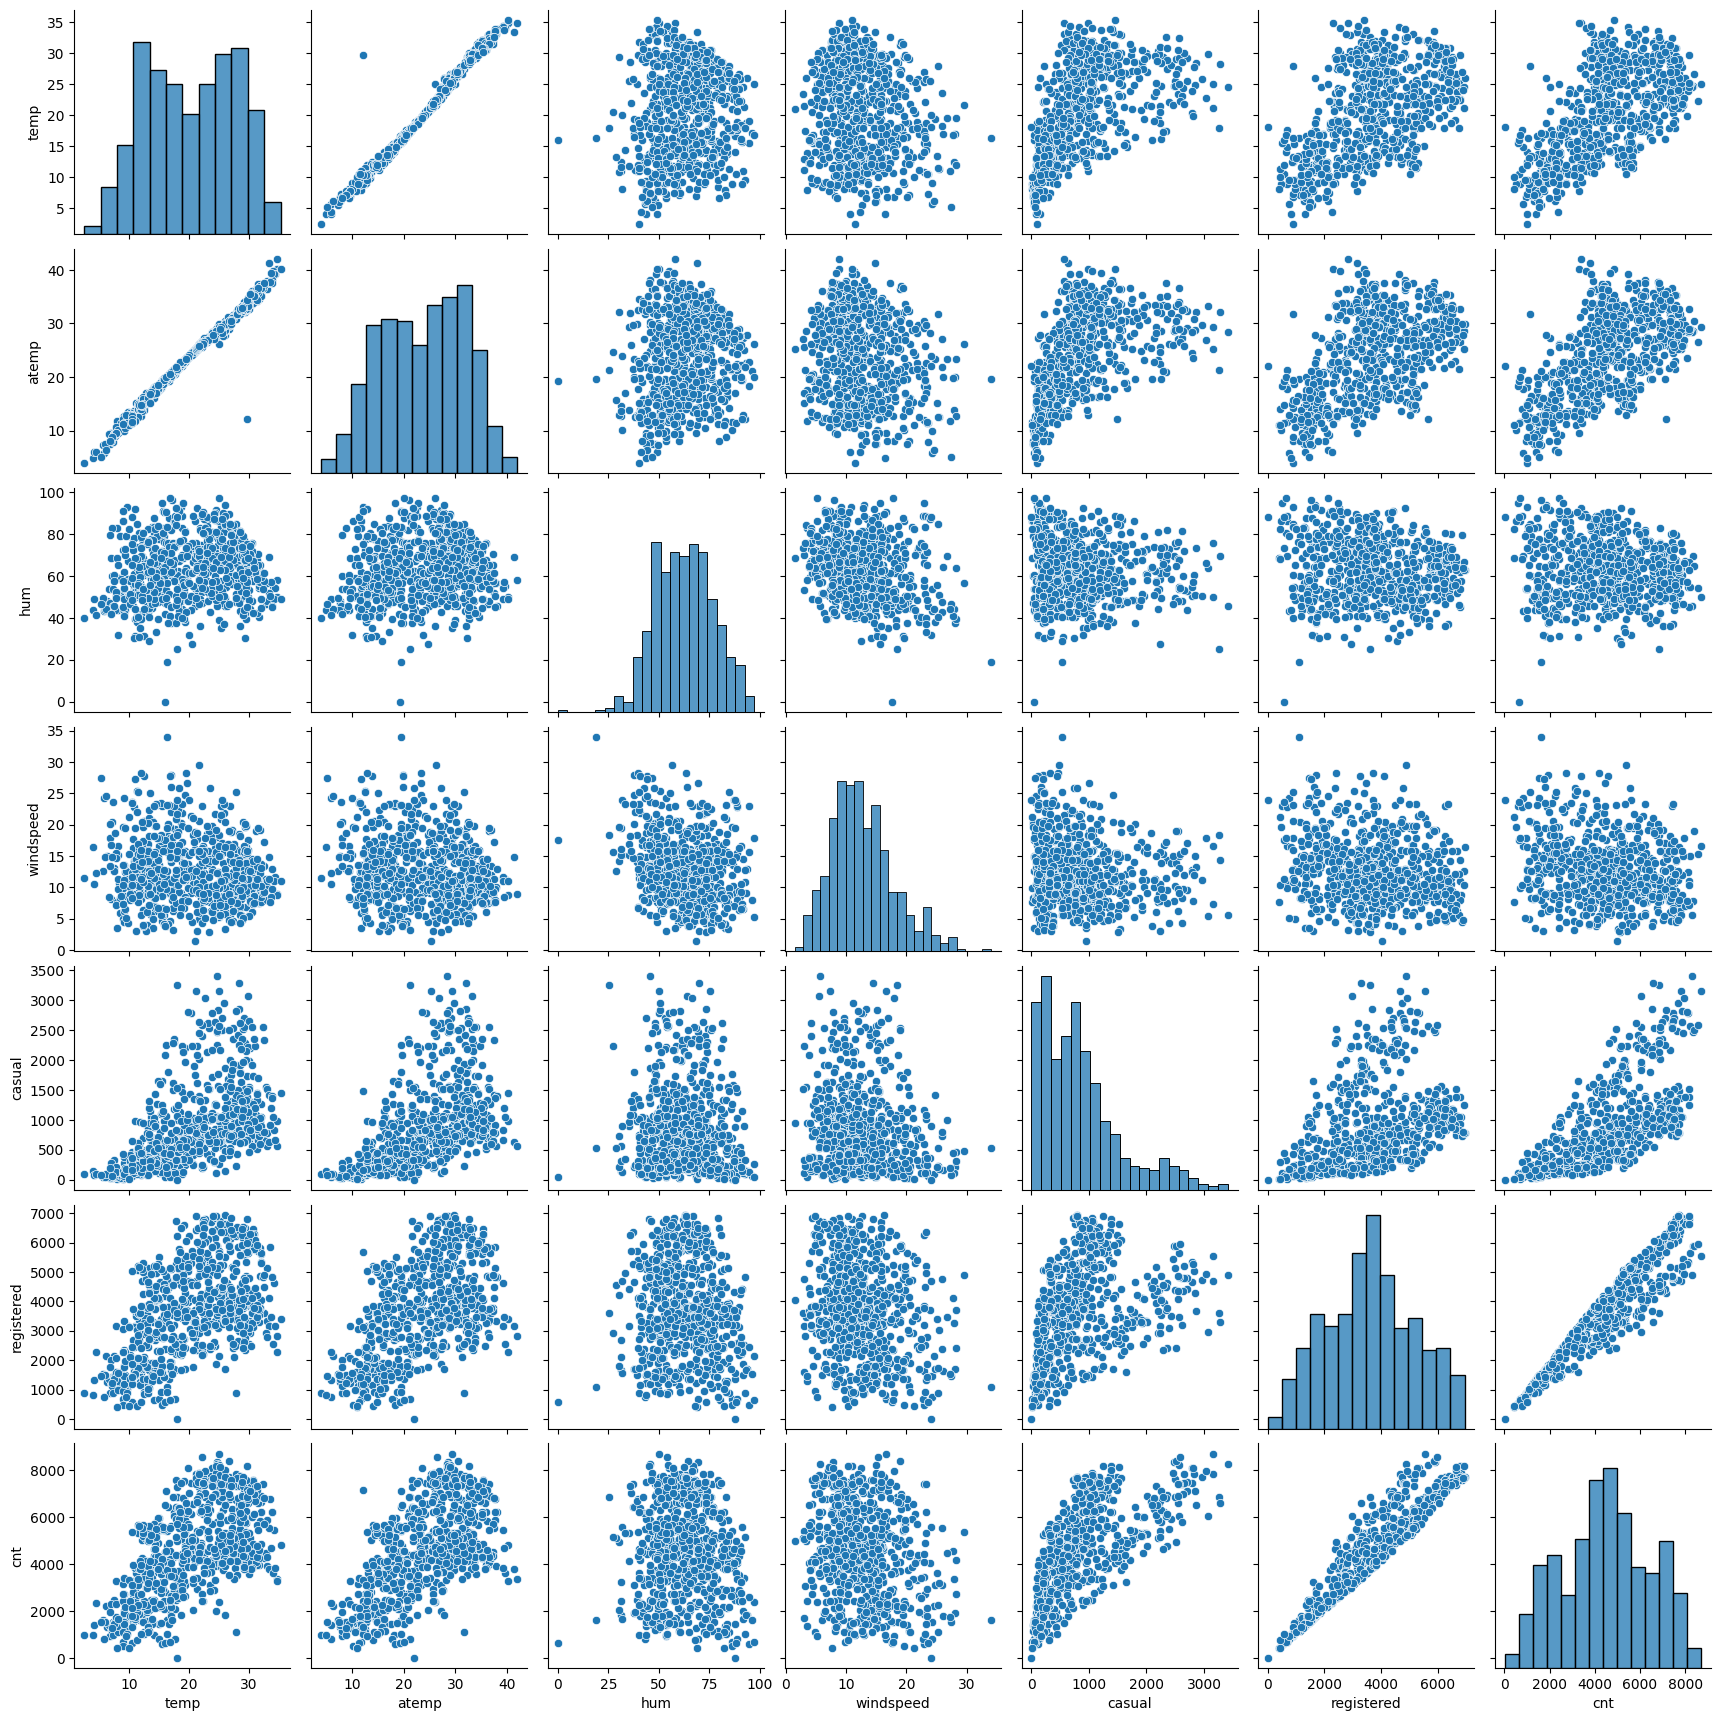

In [359]:
sns.pairplot(dataset_numeric)
plt.show()

In [360]:
corr=dataset_numeric.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

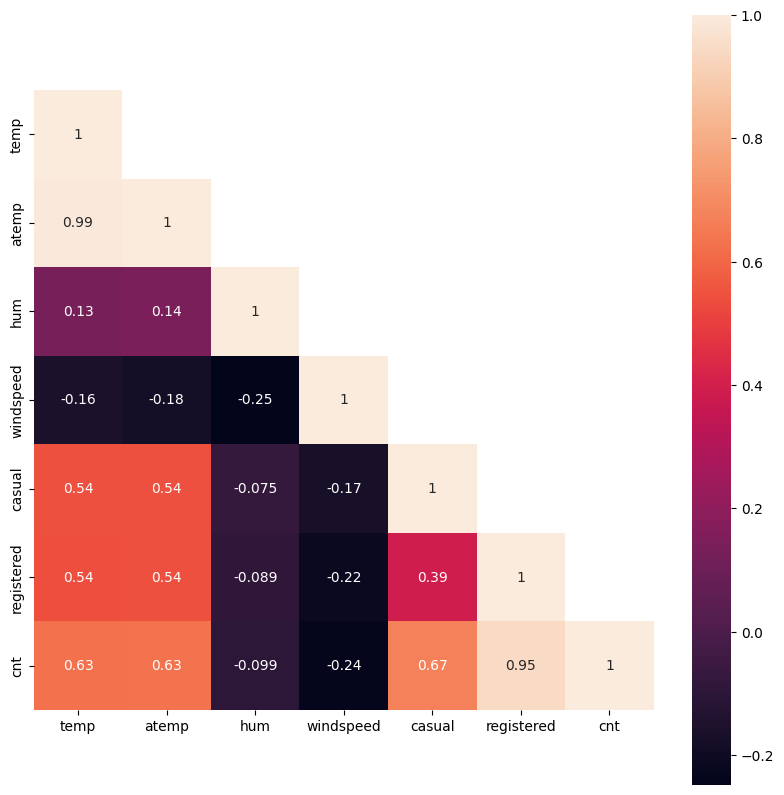

In [361]:
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,mask=mask,vmax=1,square=True,annot=True)

In [362]:
#Dropping the closely correlated column
dataset.drop('atemp',axis=1,inplace=True)
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Sat,0,2,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,Spring,0,Jan,0,Sun,0,2,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,Spring,0,Jan,0,Mon,1,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,Spring,0,Jan,0,Tue,1,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,Spring,0,Jan,0,Wed,1,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,Spring,1,Dec,0,Thurs,1,2,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,Spring,1,Dec,0,Fri,1,2,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,Spring,1,Dec,0,Sat,0,2,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,Spring,1,Dec,0,Sun,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [363]:
dataset_categorical=dataset.select_dtypes(include=['object'])
dataset_categorical.head()

,season,mnth,weekday
0,Spring,Jan,Sat
1,Spring,Jan,Sun
2,Spring,Jan,Mon
3,Spring,Jan,Tue
4,Spring,Jan,Wed


In [364]:


# Assume dataset_categorical is your original DataFrame
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first=True)

# Convert any boolean values to integers (0s and 1s)
dataset_dummies = dataset_dummies.astype(int)

# Check the result
dataset_dummies

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
726,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [365]:
dataset=dataset.drop(list(dataset_categorical.columns),axis=1)
dataset

,instant,dteday,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,2,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,2,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,2,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,2,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,2,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [377]:
dataset=pd.concat([dataset,dataset_dummies],axis=1)
dataset

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
0,0,0,0,2,14.110847,80.5833,10.749882,331.0,654.0,985.0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,2,14.902598,69.6087,16.652113,131.0,670.0,801.0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,2,10.420847,65.2917,23.458911,247.0,1867.0,2114.0,...,0,0,0,0,0,0,0,1,0,0
726,1,0,1,2,10.386653,59.0000,10.416557,644.0,2451.0,3095.0,...,0,0,0,0,0,0,0,0,0,0
727,1,0,0,2,10.386653,75.2917,8.333661,159.0,1182.0,1341.0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,...,0,0,0,0,0,0,1,0,0,0


In [368]:
#Model Evaluation

from sklearn import  linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(dataset,train_size=0.7,test_size=0.3,random_state=100)
df_train

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
653,1,0,1,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,2,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,2,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,2,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,...,0,0,0,0,0,0,0,1,0,0
53,0,0,1,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,...,0,0,0,0,0,0,0,0,0,1
350,0,0,0,2,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,...,0,0,0,0,0,1,0,0,0,0


In [369]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
var=['temp','hum','windspeed','casual','registered','cnt']
df_train[var]=scaler.fit_transform(df_train[var])
df_train

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
653,1,0,1,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,2,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,2,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,2,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,...,0,0,0,0,0,0,0,1,0,0
53,0,0,1,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,...,0,0,0,0,0,0,0,0,0,1
350,0,0,0,2,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,...,0,0,0,0,0,1,0,0,0,0


In [370]:
df_train.describe()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,1.401961,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.547540,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,2.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

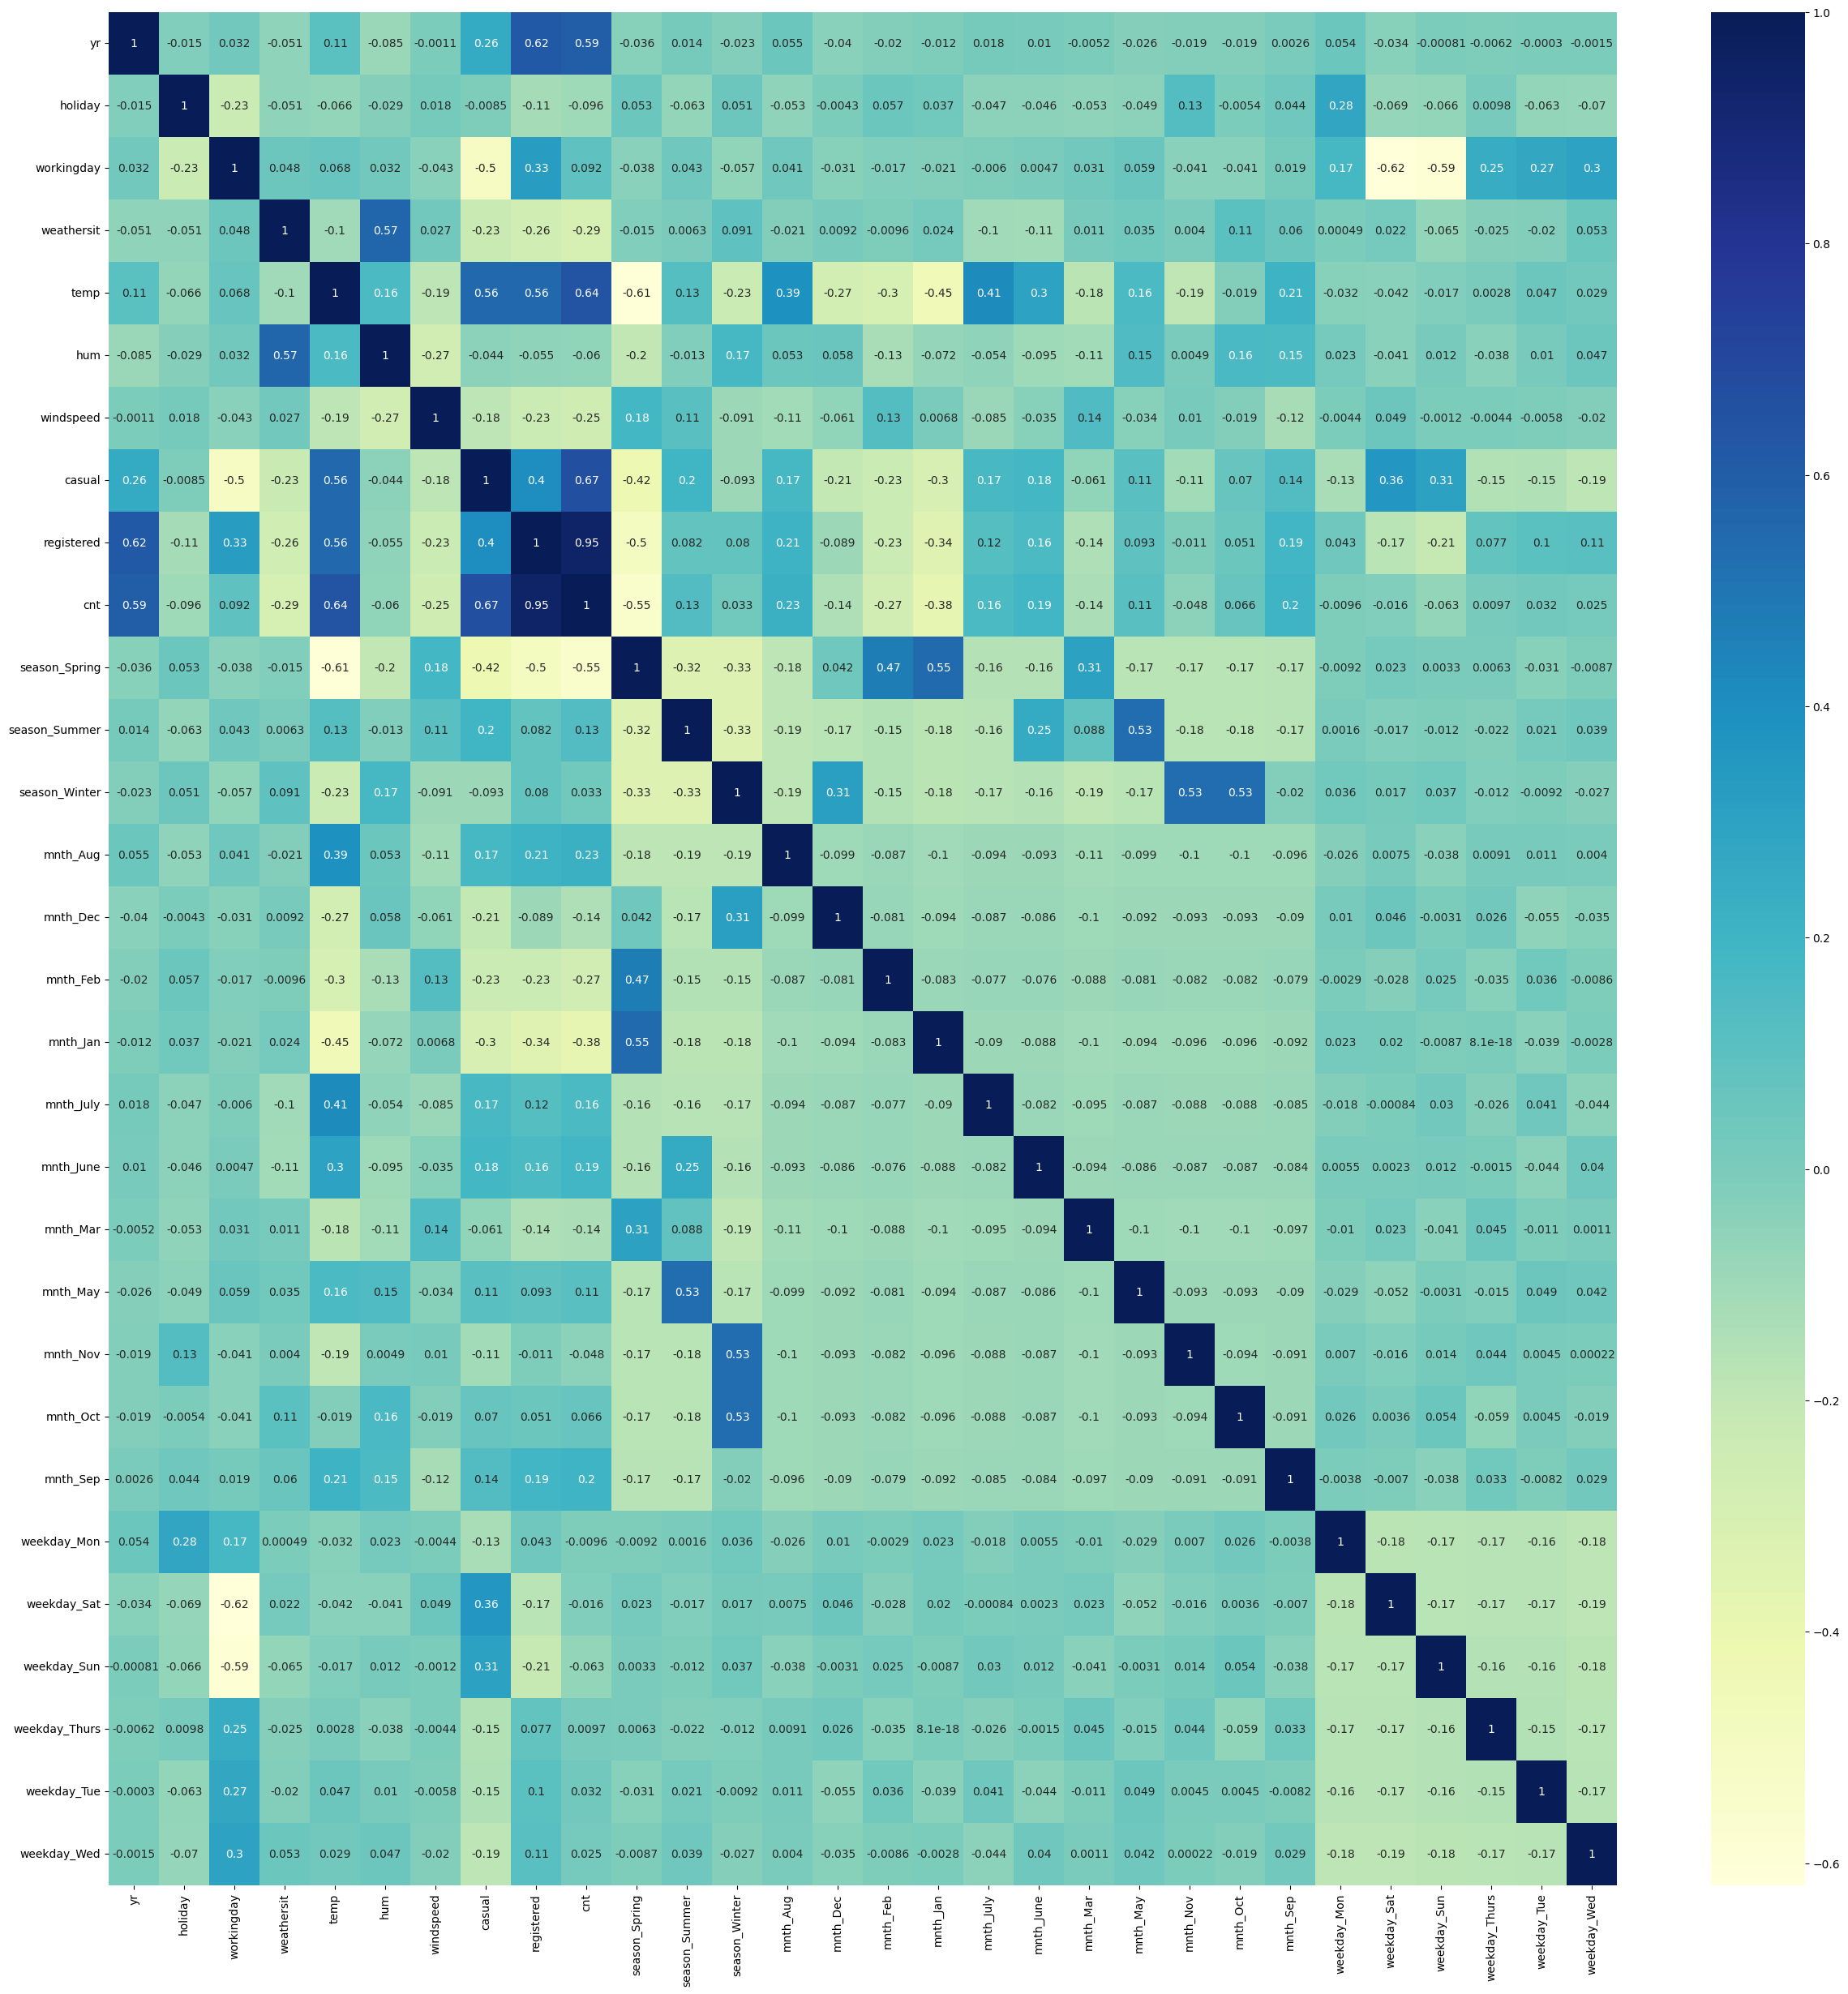

In [371]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')

In [372]:

X_train=df_train.drop(['casual','registered'],axis=1)
Y_train=df_train.pop('cnt')


In [373]:
np.asarray(X_train)

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [380]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(Y_train,X_train_lm).fit()

In [386]:
X_train_lm

,const,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,season_Spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
653,1.0,1,0,1,1,0.509887,0.575354,0.300794,0.864243,0,...,0,0,1,0,0,0,0,0,1,0
576,1.0,1,0,1,1,0.815169,0.725633,0.264686,0.827658,0,...,0,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0,2,0.442393,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,0,1,0.245101,0.498067,0.663106,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,1.0,1,0,0,2,0.395666,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,2,0.824514,0.605840,0.355596,0.764151,0,...,0,0,0,0,1,0,0,0,0,0
578,1.0,1,0,1,1,0.863973,0.679690,0.187140,0.832835,0,...,0,0,0,0,0,0,0,1,0,0
53,1.0,0,0,1,1,0.202618,0.435939,0.111379,0.218017,1,...,0,0,0,0,0,0,0,0,0,1
350,1.0,0,0,0,2,0.248216,0.577930,0.431816,0.312586,0,...,0,0,0,0,0,1,0,0,0,0


In [391]:

# Instantiate the LinearRegression model
lm = LinearRegression()

# Fit the model
lm.fit(X_train, Y_train)

# Print the coefficients and intercept
print(lm.coef_, lm.intercept_)


[ 4.31445262e-16 -1.13242749e-14 -1.12415915e-14 -2.47776994e-16
 -7.99269328e-17 -1.18329873e-17  2.00383025e-17  1.00000000e+00
 -1.22572144e-16 -4.01247725e-17 -3.65497374e-16 -6.57194767e-17
 -1.06879630e-16 -1.66148211e-18  1.57344917e-16 -8.44053870e-17
  1.13720132e-16  1.31838984e-16  1.73472348e-16  1.31838984e-16
  1.38777878e-17 -6.15826834e-17  6.93889390e-17 -1.14214194e-14
 -1.14012532e-14 -8.67361738e-18  1.30104261e-17  6.33174069e-17] 1.1657341758564144e-14


In [392]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.168e+29
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:31:36   Log-Likelihood:                 16833.
No. Observations:                 510   AIC:                        -3.361e+04
Df Residuals:                     482   BIC:                        -3.349e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.166e-16   4.89e-16      1.671      0.095   -1.44e-16    1.78e-15
yr            -3.686e-17   1.71e-16     -0.215      0.830   -3.74e-16       3e-16
holiday        3.383e-17   3.12e-16      0.108      0.914    -5.8e-16    6.47e-16
workingday     1.531e-16   1.74e-16      0.882      0.378   -1.88e-16    4.94e-16
weathersit     3.131e-16   1.31e-16      2.387      0.017    5.54e-17    5.71e-16
temp          -4.553e-16   6.56e-16     -0.694      0.488   -1.74e-15    8.34e-16
hum            3.608e-16   5.07e-16      0.711      0.477   -6.36e-16    1.36e-15
windspeed     -3.287e-16   3.53e-16     -0.932      0.352   -1.02e-15    3.64e-16
cnt               1.0000   5.79e-16   1.73e+15      0.000       1.000       1.000
season_Spring -3.782e-16   3.91e-16     -0.967      0.334   -1.15e-15     3.9e-16
season_Summer -4.376e-16   3.42e-16     -1.279      0.201   -1.11e-15    2.35e-16
season_Winter -3.724e-16   3.69e-16     -1.010      0.313    -1.1e-15    3.52e-16
mnth_Aug      -1.598e-16   4.39e-16     -0.364      0.716   -1.02e-15    7.02e-16
mnth_Dec      -2.394e-16   4.38e-16     -0.546      0.585    -1.1e-15    6.22e-16
mnth_Feb      -2.481e-16   4.29e-16     -0.578      0.563   -1.09e-15    5.95e-16
mnth_Jan      -1.752e-16   4.38e-16     -0.400      0.689   -1.04e-15    6.86e-16
mnth_July      2.038e-16   4.57e-16      0.446      0.656   -6.95e-16     1.1e-15
mnth_June      3.372e-17   3.27e-16      0.103      0.918   -6.08e-16    6.76e-16
mnth_Mar       3.469e-18    3.2e-16      0.011      0.991   -6.24e-16    6.31e-16
mnth_May       2.012e-16   2.74e-16      0.735      0.463   -3.37e-16    7.39e-16
mnth_Nov      -1.542e-16   4.74e-16     -0.325      0.745   -1.09e-15    7.78e-16
mnth_Oct      -1.518e-16   4.66e-16     -0.326      0.745   -1.07e-15    7.63e-16
mnth_Sep      -5.547e-16    4.2e-16     -1.322      0.187   -1.38e-15     2.7e-16
weekday_Mon    1.795e-16      2e-16      0.899      0.369   -2.13e-16    5.72e-16
weekday_Sat    1.978e-16    1.9e-16      1.043      0.298   -1.75e-16     5.7e-16
weekday_Sun    1.802e-16   1.82e-16      0.990      0.323   -1.77e-16    5.38e-16
weekday_Thurs  2.551e-16   2.01e-16      1.267      0.206   -1.41e-16    6.51e-16
weekday_Tue   -8.923e-17   2.02e-16     -0.442      0.659   -4.86e-16    3.08e-16
weekday_Wed    1.244e-16   1.93e-16      0.645      0.519   -2.55e-16    5.04e-16
==============================================================================
Omnibus:                        3.997   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.861
Skew:                          -0.211   Prob(JB):                        0.145
Kurtosis:                       3.059   Cond. No.                     1.12e+16
================================================================